In [1]:
import numpy as np
def sigmoid(z):
    return 1/(1+np.exp(-z))



# Forward Prop
w1 = np.array([[1,2]])
w2 = np.array([[-3,4]])
w3 = np.array([[5,-6]])

b1 = -1
b2 = 1
b3 = 2

x = np.array([[10,-17]])

a1 = sigmoid(np.dot(w1,x.T)+b1)
a2 = sigmoid(np.dot(w2,x.T)+b2)
a3 = sigmoid(np.dot(w3,x.T)+b3)

A1 = np.array([[a1[0][0],a2[0][0],a3[0][0]]])

print(f'A1 = {A1}')

w1 = np.array([[-7,8,9]])
b1 = 3

A2 = sigmoid(np.dot(w1,A1.T)+b1)
print(f'A2 = {A2[0][0]}')

A1 = [[1.38879439e-11 7.47197234e-43 1.00000000e+00]]
A2 = 0.9999938558253971


### TF

1 ==> 1 [[0.97125393]]
0 ==> 0 [[0.07289888]]
0 ==> 0 [[0.0006023]]
1 ==> 1 [[0.97590685]]
0 ==> 0 [[0.00601763]]


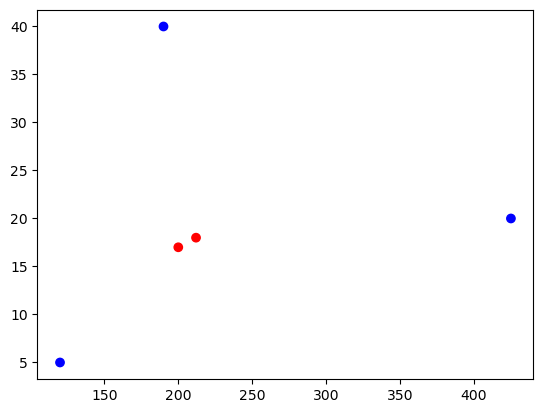

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.losses import BinaryCrossentropy

# Coffee making deeplearning

x = np.array([
    [200,17],
    [120,5],
    [425,20],
    [212,18],
    [190,40]
])

y = np.array([1,0,0,1,0])



model = Sequential([
    Dense(50,activation='relu',input_shape=(2,)),
    Dense(50,activation='relu'),
    Dense(1,activation='sigmoid')])

model.compile(loss=BinaryCrossentropy(), metrics=['accuracy'])

model.fit(x,y,epochs=1000,verbose= 0)
for i,x_i in enumerate(x):
    predictions = model.predict(np.array([x_i]), verbose=0)
    if predictions > 0.5:
        print(y[i],'==>',1,predictions)
    else:
        print(y[i],'==>',0,predictions)
        


colors = ['red' if label == 1 else 'blue' for label in y]

plt.scatter(x.T[0], x.T[1], c=colors)
plt.show()

### Hand written img classification

In [3]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from tensorflow.keras.losses import SparseCategoricalCrossentropy
import matplotlib.pyplot as plt

def display_image(x_sample, y_sample=None):
    plt.imshow(x_sample.reshape(8, 8), cmap='gray')
    plt.axis('off')
    if y_sample is not None:
        plt.title(f"Correct value: {y_sample}")
    plt.show()
    
    
    
X,y = load_digits(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=20)

model = Sequential([
    Dense(300,activation='relu',input_shape=(64,)),
    Dense(300,activation='relu'),
    Dense(10,activation='linear')])

model.compile(optimizer='adam', loss=SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

model.fit(X_train,y_train,epochs=100,verbose= 0)

final_prediction = []
predictions = model.predict(X_test, verbose=0)
for prediction in predictions:
    max_predict_score = np.where(prediction == prediction.max())[0][0]
    final_prediction.append(max_predict_score)
final_prediction = np.array(final_prediction)
print('Acc: ',accuracy_score(y_test,final_prediction))

Acc:  0.9865319865319865


#### Displaying wrong predicted values

predicted value is 8


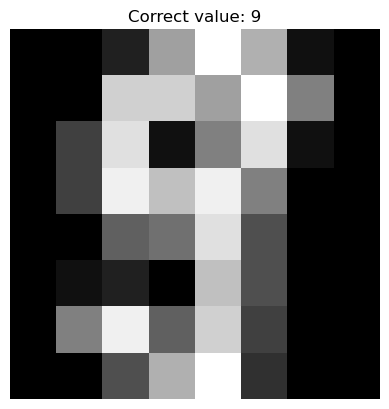

predicted value is 9


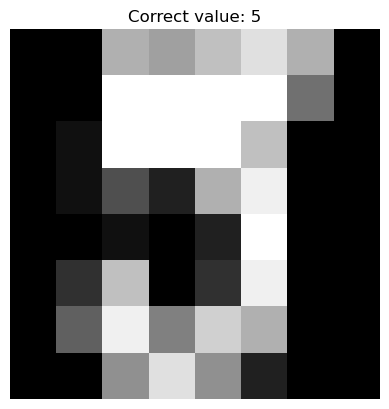

predicted value is 9


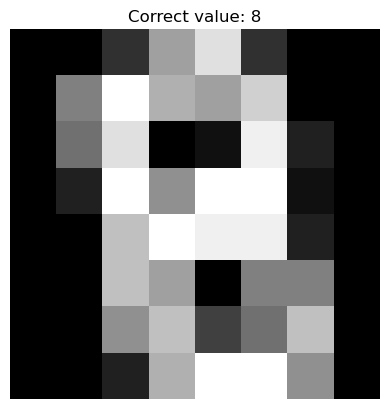

predicted value is 1


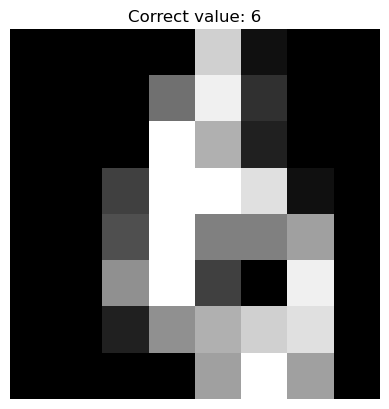

predicted value is 5


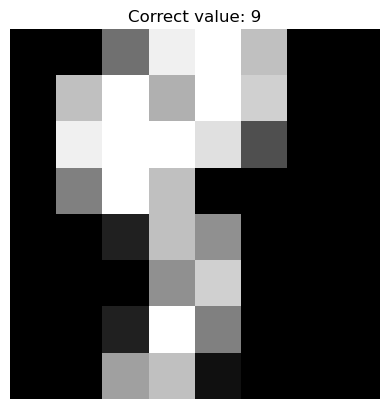

predicted value is 0


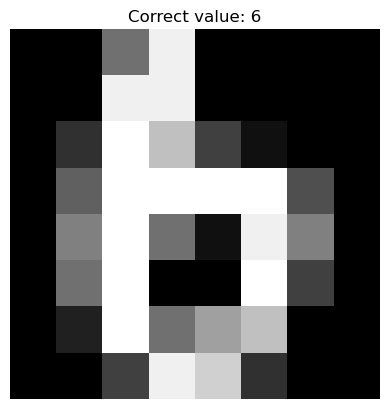

predicted value is 9


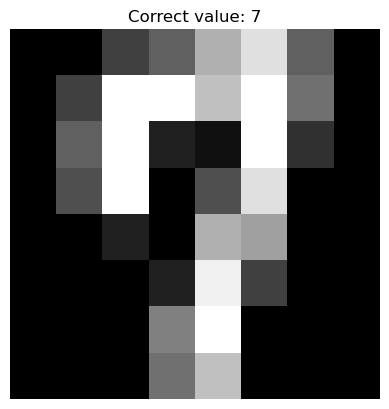

predicted value is 8


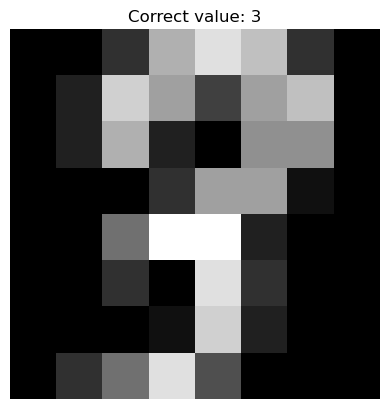

In [4]:
true_prediction = final_prediction == y_test
wrong_predict_index = np.where(true_prediction == False)[0]

for wrong_index in wrong_predict_index:
    sample_index = wrong_index
    print(f'predicted value is {final_prediction[sample_index]}')
    display_image(X_test[sample_index], y_test[sample_index])